Libraries:

In [1]:
from ollama import chat, ChatResponse, Client
from tqdm import tqdm
import random
import json
import csv
import os
import re

Files and Annotation:

In [83]:
annot = ["SolutionExp", "HintExp", "AlgoExp", "TimeComExp", "FixingExp", "TestExp", "QuestionExp", "SubQuestion", "TestQuestion"]#, "Irrelevant"]

div2_orig_ds = 'CodeforcesComments/Dataset_div2_final.json'
educ_orig_ds = 'CodeforcesComments/Dataset_educ_1.1.json'

div2_tasks = 'CodeforcesComments/Dataset_div2_tasks.json'
educ_tasks = 'CodeforcesComments/Dataset_div2_tasks.json'

general_prompt = str(f"Your are given a problem statement and a comment. Classify the comment into one of the following classes: "
        f"SolutionExp: A detailed comment explaining how to solve a problem, more like a step-by-step guide. "
        f"HintExp: It can be viewed as a sparse variant of SolutionExp in which various elements from an entire solution are presented. "
        f"AlgoExp: A comment which states the algorithm used and the submission link with little to no information. "
        f"TimeComExp: A comment which states the complexity and the submission link with little to no information. "
        f"FixingExp: A comment which explains or hints how to solve a specific bug in an implementation "
        f"TestExp: A comment which explains the result of a test case. "
        f"QuestionExp: A relevant question about a specific problem in the contest. It should have a relevant answer in the comment subtree. "
        f"SubQuestion: A comment which asks insights about why a submission fails. "
        f"TestQuestion: A comment asking for insights about a specific test’s result. "
        f"Irrelevant: Any other comment that does not fit the above labels")

In [84]:
correct, predicted = [], []

In [85]:
def annotate(client: Client, tasks: dict, final: dict):
    global correct, predicted
    for comment_link in final.keys():

        # Initial json structure
        comm_struct = final[comment_link]
        task = "" if comm_struct["problem"] == "Irrelevant" else next(("This is the task: " + t['task'] for t in tasks[comm_struct["round_id"]] if t.get("problem") == comm_struct["problem"]), "")
        if task == "Irrelevant":
            continue
        # Comment prompting
        comment = "This is the comment: " + comm_struct["text"]
        prompt = (general_prompt + task + comment + "give me in ONLY ONE WORD the prediction for the class")

        try:
            response = client.generate(model="llama3.1:70b", prompt=prompt, system="You are an educational expert.")
            # print("Correct:" + comm_struct["label"] + "  Predicted: " + response['response'])
            correct.append(comm_struct["label"])
            predicted.append(response['response'])
        except Exception as e:
            print(e)

In [ ]:
if __name__ == "__main__":
    token = open('token.txt').readline()
    cl = Client(
        host='https://chat.readerbench.com/ollama',
        headers={"Authorization": f"Bearer {token}"}
    )
    f11 = open(div2_orig_ds)
    f12 = open(div2_tasks)
    f21 = open(educ_orig_ds)
    f22 = open(educ_tasks)

    div2_orig = json.load(f11)
    div2_task = json.load(f12)

    educ_orig = json.load(f21)
    educ_task = json.load(f22)
    
    annotate(cl, div2_task, div2_orig)



Text(0.5, 0.05, 'Prediction')

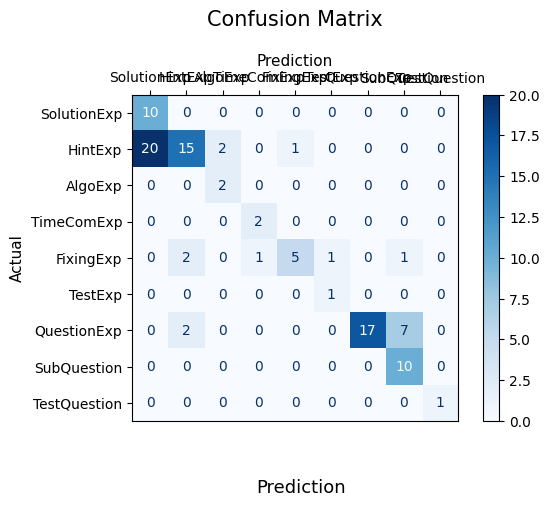

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=correct, y_pred=predicted, labels=annot)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=annot)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
#Customizations
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)


Extra teste:

In [1]:
import pandas as pd

disc = pd.read_csv('discussion.csv')
prob = pd.read_csv('problemset.csv')

print(disc.shape)
print(prob.shape)

(225054, 7)
(2419, 7)


/tmp/ipykernel_10310/1997659842.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  disc = pd.read_csv('discussion.csv')


In [2]:
print(disc.columns)
print(prob.columns)

Index(['Problem Name', 'Id', 'Parent_Id', 'Text', 'Date', 'Up Votes',
       'Username'],
      dtype='object')
Index(['Id', 'Problem Name', 'Description', 'Difficulty', 'Accepted',
       'Submissions', 'Acceptance Rate'],
      dtype='object')


In [3]:
disc.head()

,Problem Name,Id,Parent_Id,Text,Date,Up Votes,Username
0,height-of-binary-tree-after-subtree-removal-qu...,1,0,I solved this question i thought its too easy ...,"Aug 13, 2024",129,Mahmoud Abou Amoun
1,height-of-binary-tree-after-subtree-removal-qu...,2,1,"Oh yes Indeed, I believe its hard for that, Go...","Oct 26, 2024",3,__ShahedAli__
2,height-of-binary-tree-after-subtree-removal-qu...,3,0,I was really hoping for an easy today 😅,"Oct 26, 2024",56,Benjamin Thorpe
3,height-of-binary-tree-after-subtree-removal-qu...,4,0,This is a great hard. It doesn't require some ...,"Oct 26, 2024",69,Ben
4,height-of-binary-tree-after-subtree-removal-qu...,5,4,I agree - this is one of the best hard problem...,"Oct 26, 2024",2,vinnisnx


In [4]:
prob.head()

,Id,Problem Name,Description,Difficulty,Accepted,Submissions,Acceptance Rate
0,0,height-of-binary-tree-after-subtree-removal-qu...,<p>You are given the <code>root</code> of a <s...,Hard,98K,178.1K,55.0%
1,1,two-sum\n,<p>Given an array of integers <code>nums</code...,Easy,15.3M,28.1M,54.3%
2,2,add-two-numbers\n,<p>You are given two <strong>non-empty</strong...,Medium,5.2M,11.6M,44.6%
3,3,longest-substring-without-repeating-characters\n,"<p>Given a string <code>s</code>, find the len...",Medium,6.6M,18.4M,35.8%
4,4,median-of-two-sorted-arrays\n,<p>Given two sorted arrays <code>nums1</code> ...,Hard,3M,7.1M,42.0%


In [6]:
set1 = disc['Problem Name'].unique()
set2 = disc['Problem Name'].unique()
print(f"set1 -> {len(set1)}")
print(f"set2 -> {len(set2)}")
jointset = set(el for el in set1 if el in set2)
print(f"joint set -> {len(jointset)}")

set1 -> 2418
set2 -> 2418
joint set -> 2418
